
# Simple Linear Regression with Gradient Descent and Scikit-Learn


Implementation of a simple linear regression model with two different approaches. The first is with the gradient descent algorithm. Second is using linear regression model from the Scikit-Learn module from Python library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AttendanceMarks.csv')
df.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


In [3]:
X= df['MSE']
Y=df['ESE']

In [4]:
beta0=0
beta1=0
alpha=0.01
count =10000
n=float(len(X))

The following code segment calculates the partial derivative of the error function. It minimizes the error function to calculate the values of beta0 and beta1.

In [5]:
for i in range(count): 
    Ybar = beta1*X + beta0    
    beta1 = beta1 - (alpha/n)*sum(X*(Ybar-Y))
    beta0 = beta0 - (alpha/n)*sum(Ybar-Y)
    
print(beta0,beta1)

30.66113097444092 1.6326392534114609


The following code segment plots the identified best fit line or regression line visually.

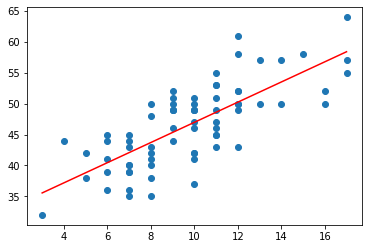

In [6]:
Ybar = beta1*X + beta0

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Ybar), max(Ybar)], color='red')  # regression line
plt.show()

Calculation of Error.

In [7]:
import math
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse


rse= RSE(df['ESE'],Ybar)
print(rse)

4.3962248281750655


The second way to indirectly implement the gradient descent algorithm is to use the LinearRegression module form Scikit-Learn.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

The following code segments first extract input and output feature vector from the data frame and convert them into the array representation.

In [9]:
x = np.array(df['MSE']).reshape(-1,1)
y = np.array(df['ESE']).reshape(-1,1)
 

lr = LinearRegression()
lr.fit(x,y)


print(lr.coef_)
print(lr.intercept_)

yp = lr.predict(x)
rse = RSE(y,yp)

print(rse)

[[1.63215164]]
[30.66635246]
4.396224549647786


**Interpretation of the Result:**

The Linear Regression model implementd through the gradient descent algorithm  and from the LinearRegression() class from the Scikit-Learn module approximately claculates the same values for slope (beta1) and y-intercept(beta0) and also with the acceptable level of RSE i.e. **4.39.** i.e. the model predicts  end sem exam marks with +/- 4 error from mid-sem exam.